# Donor Choose : Support Vector Machine

In [1]:
import os

os.chdir('E:\Datasets\DonorChoose')

In [2]:
import pandas as pd

donor = pd.read_csv('cleandonor4.csv')

donor.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,project_title
0,Mrs.,IN,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23,PreK-Two,Educational Support for English Learners at Home
1,Mr.,FL,7,1,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Six-Eight,Wanted: Projector for Hungry Learners


In [3]:
# We are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [4]:
from tqdm import tqdm
ftitle = [] 

for sen in tqdm( donor['project_title'].values ): 
    strY = " "

    for w in sen.lower().split():
        if w not in stopwords:
            strY = strY + w + " "

    ftitle.append( strY.strip() )

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 38783.36it/s]


In [5]:
donor.drop(['project_title'], axis=1, inplace=True)
donor['cleanTitle'] = ftitle

### Handling Missing data

In [6]:
nan = donor[ donor['teacher_prefix'].isnull() ]
nan

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle


In [7]:
donor = donor[0 : 50000]

In [8]:
donor.shape

(50000, 11)

In [9]:
Y = donor['project_is_approved']

In [10]:
donor.drop(['project_is_approved'], axis = 1, inplace = True)

In [11]:
X = donor

## Splitting data

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.33, stratify = Y) # Spliting into Test and Train

# stratify : we need to pass array containing class label as an argument to stratify

xtrain, xcv, ytrain, ycv = train_test_split( xtrain, ytrain, test_size = 0.33, stratify = ytrain )

In [13]:
print( xtrain.shape )
print( xcv.shape )
print( xtest.shape )

print( ytrain.shape )
print( ycv.shape )
print( ytest.shape )

(22445, 10)
(11055, 10)
(16500, 10)
(22445,)
(11055,)
(16500,)


## Creating data matrix

### Essay BOW

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 10, ngram_range=(1,2), max_features = 5000 )
# ngram_range : The lower and upper boundary of the range of n-values for different n-grams to be extracted.
# max_features : build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

vect.fit( xtrain['cleanEssay'].values )
# vect.fit( text ): Means that internally it is only learning the vocabulary of `Text` i.e. unique n-grams

# THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA

xtrEssayBOW = vect.transform( xtrain['cleanEssay'].values ) 
xcvEssayBOW = vect.transform( xcv['cleanEssay'].values ) 
xteEssayBOW = vect.transform( xtest['cleanEssay'].values )

In [15]:
print( xtrEssayBOW.shape )
print( xcvEssayBOW.shape )
print( xteEssayBOW.shape )

(22445, 5000)
(11055, 5000)
(16500, 5000)


### Essay TFIDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df=10, max_features = 5000, ngram_range = (1,2) )
tfidfvect.fit( xtrain['cleanEssay'].values )

xtrEssayTFIDF = tfidfvect.transform( xtrain['cleanEssay'].values )
xcvEssayTFIDF = tfidfvect.transform( xcv['cleanEssay'].values )
xteEssayTFIDF = tfidfvect.transform( xtest['cleanEssay'].values )

print( xtrEssayTFIDF.shape )
print( xcvEssayTFIDF.shape )
print( xteEssayTFIDF.shape )

(22445, 5000)
(11055, 5000)
(16500, 5000)


### Essay Word 2 vec

In [17]:
# Function Creating a list that contains all the words in the data column

def stow( data ):
    sentence = []

    for sen in tqdm( data.values ):
        fsentence = []
    
        for w in sen.split():
            for cw in w.split():
            
                if cw.isalpha():
                    fsentence.append( cw.lower() )
                else:
                    continue
        sentence.append( fsentence )
    return sentence

In [18]:
import gensim

In [19]:
xtrw = stow( xtrain['cleanEssay'] ) # List of words for xtrain

print( len( xtrw ) )

xtrmodel = gensim.models.Word2Vec( xtrw, min_count = 5, size =50, workers = 4 )
# min_count : If a word dosent apper more then the value assigned do't construct w2v for it
# size: dimension of vector to be constructed
# workers: If you hav a multi cores you can set it to 4 for performence

xtrwords = list( xtrmodel.wv.vocab )
len( xtrwords )

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:04<00:00, 5182.71it/s]


22445


10833

In [20]:
# For Cross validation

xcvw = stow( xcv['cleanEssay'] )

print( len( xcvw ) )

xcvmodel = gensim.models.Word2Vec( xcvw, min_count = 5, size =50, workers = 4 )

xcvwords = list( xcvmodel.wv.vocab )
len( xcvwords )

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:02<00:00, 4854.29it/s]


11055


8151

In [21]:
# For Test

xtew = stow( xtest['cleanEssay'] )

print( len( xtew ) )

xtemodel = gensim.models.Word2Vec( xtew, min_count = 5, size =50, workers = 4 )

xtewords = list( xtemodel.wv.vocab )
len( xtewords )

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:03<00:00, 4476.28it/s]


16500


9455

### Essay Avg Word 2 vec

In [22]:
import numpy as np


def avgw2v( data, words, model ):
    sentV = [] # average word 2 vec for each essay is stored in this

    for sent in tqdm( data ):
    
        svec = np.zeros(50)
        cnw = 0
    
        for w in sent:
            if w in words:
                vec = model.wv[ w ]  # Computing word 2 vec
                svec += vec     # Add it to the svec
                cnw += 1
            
        if cnw != 0:        
            svec /= cnw  # Averaging with the count of number of words with valid vector in the Essay
        sentV.append( svec )
    
    return sentV

In [23]:
# For Train
xtrAW2V = np.asarray( avgw2v( xtrw, xtrwords, xtrmodel ) )

xtrAW2V[20]

xtrAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [02:59<00:00, 125.00it/s]


(22445, 50)

In [25]:
xcvAW2V = np.asarray( avgw2v( xcvw, xtrwords, xtrmodel ) )

xcvAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:41<00:00, 263.47it/s]


(11055, 50)

In [26]:
xteAW2V = np.asarray( avgw2v( xtew, xtrwords, xtrmodel ) )

xteAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:16<00:00, 216.25it/s]


(16500, 50)

### Essay TFIDF WW2V

In [27]:
print( tfidfvect.get_feature_names()[1000:1020] )
len( tfidfvect.get_feature_names() )

['comfortable and', 'comfortably', 'comfy', 'coming', 'coming from', 'coming to', 'committed', 'committed to', 'common', 'common core', 'communicate', 'communication', 'communication skills', 'communities', 'community', 'community and', 'community in', 'community is', 'community my', 'community of']


5000

In [28]:
essayFeatures = tfidfvect.get_feature_names()  # Tf idf words/ col names

In [29]:
def ww2v( data, model, TFIDF, feat = essayFeatures ):
    
    essayWw2v = []  # the Tfidf weighted w2v for each sentence is stored here
    row = 0

    for sent in tqdm( data ):
        sv = np.zeros( 50 )  # as word vectors are of zero length
        ws = 0  # ws : weight sum, num of words with a valid vector in the sentence/review

        for w in sent:      

            try:
                vec = model.wv[ w ]
                tfidf = TFIDF[ row, feat.index( w ) ]

                sv += ( vec * tfidf )
                ws += tfidf

            except:
                pass

        if ws != 0:
            sv /= ws
        essayWw2v.append( sv )
        row += 1

    return essayWw2v

In [30]:
# For train
xtrWW2V = np.asarray( ww2v( xtrw, xtrmodel, xtrEssayTFIDF ) )

xtrWW2V.shape

100%|████████████████████████████████████████████████████████████████████████████| 22445/22445 [10:02<00:00, 37.23it/s]


(22445, 50)

In [31]:
xcvWW2V = np.asarray( ww2v( xcvw, xtrmodel, xcvEssayTFIDF ) )

xcvWW2V.shape

100%|████████████████████████████████████████████████████████████████████████████| 11055/11055 [04:13<00:00, 43.61it/s]


(11055, 50)

In [32]:
xteWW2V = np.asarray( ww2v( xtew, xtrmodel, xteEssayTFIDF ) )

xteWW2V.shape

100%|████████████████████████████████████████████████████████████████████████████| 16500/16500 [06:09<00:00, 44.66it/s]


(16500, 50)

### Project Title BOW

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 10, ngram_range = (1,2), max_features = 5000 )

vect.fit( xtrain['cleanTitle'].values )

xtrTitleBOW = vect.transform( xtrain['cleanTitle'].values )
xcvTitleBOW = vect.transform( xcv['cleanTitle'].values )
xteTitleBOW = vect.transform( xtest['cleanTitle'].values )

print( xtrTitleBOW.shape )
print( xcvTitleBOW.shape )
print( xteTitleBOW.shape )

(22445, 1662)
(11055, 1662)
(16500, 1662)


### Project title TFIDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df=10, ngram_range = (1,2), max_features = 5000 )
tfidfvect.fit( xtrain['cleanTitle'].values )

xtrTitleTFIDF = tfidfvect.transform( xtrain['cleanTitle'].values )
xcvTitleTFIDF = tfidfvect.transform( xcv['cleanTitle'].values )
xteTitleTFIDF = tfidfvect.transform( xtest['cleanTitle'].values )

print( xtrTitleTFIDF.shape )
print( xcvTitleTFIDF.shape )
print( xteTitleTFIDF.shape )

(22445, 1662)
(11055, 1662)
(16500, 1662)


### Project Title Word 2 Vec

In [35]:
# For Train

xtrTitlew = stow( xtrain['cleanTitle'] )  # stow : is a defined by me that coverts a list of sentences to words

print( len( xtrTitlew ) )

xtrTitlemodel = gensim.models.Word2Vec( xtrTitlew, min_count = 5, size =50, workers = 4 )

xtrTitlewords = list( xtrTitlemodel.wv.vocab )
len( xtrTitlewords )

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 43195.77it/s]


22445


1681

In [36]:
# For Cross Validation

xcvTitlew = stow( xcv['cleanTitle'] )

print( len( xcvTitlew ) )

xcvTitlemodel = gensim.models.Word2Vec( xcvTitlew, min_count = 5, size =50, workers = 4 )

xcvTitlewords = list( xtrTitlemodel.wv.vocab )
len( xcvTitlewords )

100%|████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 230916.49it/s]


11055


1681

In [37]:
# For Test

xteTitlew = stow( xtest['cleanTitle'] )

print( len( xteTitlew ) )

xteTitlemodel = gensim.models.Word2Vec( xteTitlew, min_count = 5, size =50, workers = 4 )

xteTitlewords = list( xtrTitlemodel.wv.vocab )
len( xteTitlewords )

100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 275736.56it/s]


16500


1681

### Project title Avg Word 2 vec

In [38]:
# For Train

xtrTitleAW2V = np.asarray( avgw2v( xtrTitlew, xtrTitlewords, xtrTitlemodel ) )

xtrTitleAW2V.shape

# avgw2v( data, words, model ):

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:01<00:00, 20009.64it/s]


(22445, 50)

In [39]:
# For Cross validation

xcvTitleAW2V = np.asarray( avgw2v( xcvTitlew, xcvTitlewords, xtrTitlemodel ) )

xcvTitleAW2V.shape

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 23534.13it/s]


(11055, 50)

In [40]:
# For Test

xteTitleAW2V = np.asarray( avgw2v( xteTitlew, xteTitlewords, xtrTitlemodel ) )

xteTitleAW2V.shape

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 17356.85it/s]


(16500, 50)

### Project title TFIDF WW2V

In [41]:
print( tfidfvect.get_feature_names()[0:30] )
len( tfidfvect.get_feature_names() )

['05', '10', '101', '16', '1st', '1st grade', '1st graders', '2016', '2017', '21st', '21st century', '2nd', '2nd grade', '2nd graders', '3d', '3d printer', '3d printing', '3rd', '3rd grade', '3rd graders', '4th', '4th grade', '4th graders', '5th', '5th grade', '5th graders', '6th', '6th grade', '8th', '8th grade']


1662

In [42]:
titlefeatures = tfidfvect.get_feature_names()

In [43]:
# For train
xtrTitleWW2V = np.asarray( ww2v( xtrTitlew, xtrTitlemodel, xtrTitleTFIDF, titlefeatures ) )

xtrTitleWW2V.shape

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:03<00:00, 5995.89it/s]


(22445, 50)

In [44]:
# For Cross validation
xcvTitleWW2V = np.asarray( ww2v( xcvTitlew, xtrTitlemodel, xcvTitleTFIDF, titlefeatures ) )

xcvTitleWW2V.shape

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:01<00:00, 5529.77it/s]


(11055, 50)

In [45]:
# For Test
xteTitleWW2V = np.asarray( ww2v( xteTitlew, xtrTitlemodel, xteTitleTFIDF, titlefeatures ) )

xteTitleWW2V.shape

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:02<00:00, 6194.26it/s]


(16500, 50)

### State

In [46]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['school_state'].values )

xtrState = vectorizer.transform( xtrain['school_state'].values )
xcvState = vectorizer.transform( xcv['school_state'].values )
xteState = vectorizer.transform( xtest['school_state'].values )

print( xtrState.shape )
print( xcvState.shape )
print( xteState.shape )

(22445, 51)
(11055, 51)
(16500, 51)


In [47]:
print( vectorizer.get_feature_names() )

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### Teacher Prefix

In [48]:
vectorizer = CountVectorizer(vocabulary = ['dr', 'mr', 'mrs', 'ms', 'teacher'])

vectorizer.fit( xtrain['teacher_prefix'].values )

xtrPrefix = vectorizer.transform( xtrain['teacher_prefix'].values )
xcvPrefix = vectorizer.transform( xcv['teacher_prefix'].values )
xtePrefix = vectorizer.transform( xtest['teacher_prefix'].values )

print( xtrPrefix.shape )
print( xcvPrefix.shape )
print( xtePrefix.shape )

(22445, 5)
(11055, 5)
(16500, 5)


In [49]:
print( vectorizer.get_feature_names() )

['dr', 'mr', 'mrs', 'ms', 'teacher']


### Category

In [50]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['clean_categories'].values )

xtrCat = vectorizer.transform( xtrain['clean_categories'].values )
xcvCat = vectorizer.transform( xcv['clean_categories'].values )
xteCat = vectorizer.transform( xtest['clean_categories'].values )

print( xtrCat.shape )
print( xcvCat.shape )
print( xteCat.shape )

(22445, 15)
(11055, 15)
(16500, 15)


In [51]:
print( vectorizer.get_feature_names() )

['appliedlearning', 'arts', 'care', 'civics', 'health', 'history', 'hunger', 'language', 'literacy', 'math', 'music', 'science', 'specialneeds', 'sports', 'warmth']


### Sub Category

In [52]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['clean_subcategory'].values )

xtrSubCat = vectorizer.transform( xtrain['clean_subcategory'].values )
xcvSubCat = vectorizer.transform( xcv['clean_subcategory'].values )
xteSubCat = vectorizer.transform( xtest['clean_subcategory'].values )

print( xtrSubCat.shape )
print( xcvSubCat.shape )
print( xteSubCat.shape )

(22445, 37)
(11055, 37)
(16500, 37)


In [53]:
print( vectorizer.get_feature_names() )

['appliedsciences', 'care', 'careerprep', 'charactereducation', 'civics', 'college', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'fitness', 'foreignlanguages', 'geography', 'government', 'gym', 'health', 'history', 'hunger', 'lifescience', 'literacy', 'literature', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth', 'wellness', 'writing']


### Project Grade Category

In [54]:
vectGCat = CountVectorizer()

vectGCat.fit( xtrain['cleanProjectGradeCategory'].values )

xtrGCat = vectGCat.transform( xtrain['cleanProjectGradeCategory'].values )
xcvGCat = vectGCat.transform( xcv['cleanProjectGradeCategory'].values )
xteGCat = vectGCat.transform( xtest['cleanProjectGradeCategory'].values )

print( xtrGCat.shape )
print( xcvGCat.shape )
print( xteGCat.shape )

(22445, 8)
(11055, 8)
(16500, 8)


### Price

In [55]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['price'].values.reshape(-1,1) )

xtrPrice = norm.transform( xtrain['price'].values.reshape(-1,1) )
xcvPrice = norm.transform( xcv['price'].values.reshape(-1,1) )
xtePrice = norm.transform( xtest['price'].values.reshape(-1,1) )

print( xtrPrice.shape )
print( xcvPrice.shape )
print( xtePrice.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Previously Posted projects

In [56]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

xtrPrev = norm.transform( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xcvPrev = norm.transform( xcv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xtePrev = norm.transform( xtest['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

print( xtrPrev.shape )
print( xcvPrev.shape )
print( xtePrev.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Quantity

In [58]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['quantity'].values.reshape(-1,1) )

xtrQuan = norm.transform( xtrain['quantity'].values.reshape(-1,1) )
xcvQuan = norm.transform( xcv['quantity'].values.reshape(-1,1) )
xteQuan = norm.transform( xtest['quantity'].values.reshape(-1,1) )

print( xtrQuan.shape )
print( xcvQuan.shape )
print( xteQuan.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Merging Features

### Set 1

In [59]:
from scipy.sparse import hstack

xtr1 = hstack(( xtrEssayBOW, xtrTitleBOW, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv1 = hstack(( xcvEssayBOW, xcvTitleBOW, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte1 = hstack(( xteEssayBOW, xteTitleBOW, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr1.shape, ytrain.shape )
print( xcv1.shape, ycv.shape )
print( xte1.shape, ytest.shape )

(22445, 6781) (22445,)
(11055, 6781) (11055,)
(16500, 6781) (16500,)


### Set 2

In [60]:
from scipy.sparse import hstack

xtr2 = hstack(( xtrEssayTFIDF, xtrTitleTFIDF, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv2 = hstack(( xcvEssayTFIDF, xcvTitleTFIDF, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte2 = hstack(( xteEssayTFIDF, xteTitleTFIDF, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr2.shape, ytrain.shape )
print( xcv2.shape, ycv.shape )
print( xte2.shape, ytest.shape )

(22445, 6781) (22445,)
(11055, 6781) (11055,)
(16500, 6781) (16500,)


### Set 3

In [61]:
from scipy.sparse import hstack

xtr3 = hstack(( xtrAW2V, xtrTitleAW2V, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv3 = hstack(( xcvAW2V, xcvTitleAW2V, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte3 = hstack(( xteAW2V, xteTitleAW2V, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr3.shape, ytrain.shape )
print( xcv3.shape, ycv.shape )
print( xte3.shape, ytest.shape )

(22445, 219) (22445,)
(11055, 219) (11055,)
(16500, 219) (16500,)


### Set 4

In [62]:
from scipy.sparse import hstack

xtr4 = hstack(( xtrWW2V, xtrTitleWW2V, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv4 = hstack(( xcvWW2V, xcvTitleWW2V, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte4 = hstack(( xteWW2V, xteTitleWW2V, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr4.shape, ytrain.shape )
print( xcv4.shape, ycv.shape )
print( xte4.shape, ytest.shape )

(22445, 219) (22445,)
(11055, 219) (11055,)
(16500, 219) (16500,)


In [63]:
from sklearn import linear_model
from sklearn.calibration import CalibratedClassifierCV

import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix
import seaborn as sn

## Functions 

### Function to Apply SVM on different alpha & finding best alpha using AUC 

In [64]:
def batchPredict( data, classifier ): # Predict the probablity of data points in batch i.e; some data points at once 
    
    yPred = []
    
    loop = data.shape[0] - data.shape[0] % 1000   # data.shape[0] : no of rows in data matrix
    # for ex data shape = 4489 then loop = 4489 - 4489%1000 = 4489 - 489 = 4000 
    # Now we can divide our loop into 4 interval of 1000s and one remaining 489
    # ie; 1-1000 in 1st iteration 1000-2000 in 2nd iteration 2000-3000 in 3rd 3000-4000 in 4th and 4000-4489 in the last iteraion
    
    for i in range( 0, loop, 1000 ):
        # If loop = 4000 Computes proba for 0 - 4000 in 4 iterations
       
        yPred.extend( classifier.predict_proba( data[i : i+1000] )[ :, 1] ) # [ :, 1] : All row Only 1 col
        # predict_proba : Return probability estimates for the test data X.

    yPred.extend( classifier.predict_proba( data[ loop : ] )[ :, 1 ] )
    # computes probab for remaining points

    return yPred

In [65]:
def BestA( xtr, xcv, ytr, ycv ):
    
    trAUC = []
    cvAUC = []
    
    alpha = [ 10**-4, 10**-3, 10**-2, 10**-1, 1, 10**1, 10**2 ]
    penalty = ['l1', 'l2']

    print(' '*4,'- First -', ' '*6,'- Second -', ' '*6,'- Third -', ' '*6,'- Fourth -', ' '*6,'- Fifth -', ' '*6,'- Sixth -'\
             , ' '*6,'- Seventh -')
    
    for i in alpha :
        for j in penalty :
            
            model = linear_model.SGDClassifier(alpha = i, loss = 'hinge', penalty = j, class_weight ='balanced', n_jobs = -1 )
            
            clf = CalibratedClassifierCV( model )  # Because predict_proba not present in loss = hinge            
            clf.fit(xtr, ytr)

            ytrPred = batchPredict( xtr, clf )    
            ycvPred = batchPredict( xcv, clf )

            # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
            # not the predicted outputs 

            trAUC.append( roc_auc_score( ytr, ytrPred ))
            cvAUC.append( roc_auc_score( ycv, ycvPred ))

        print('#'*16, end =' ' )

    a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    # Here, 1 means 10**-4  and l1    2 means 10**-4  and l2    3 means 10**-3 and l1   4 means 10**-3 and l2 ..........
    # 5 means 10**-2 and l1    6 means 10**-2 and l2     7 means 10**-1 and l1 .......
    
    plt.figure( figsize = ( 15, 5 ) )

    plt.plot( a, trAUC, label = 'Train AUC')
    plt.plot( a, cvAUC, label = 'CV AUC')
    
    plt.scatter( a, trAUC, label = 'Train AUC points')
    plt.scatter( a, cvAUC, label = 'CV AUC points')

    plt.legend()
    plt.xlabel("alpha: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()
    plt.close()

### <br>Function to convert Predicted Score to Binary and creating Confusion Matrix

In [66]:
def predictCM( probab, threshold, fpr, tpr ):
    
    t = threshold[ np.argmax( fpr*( 1 - tpr ) ) ]  # returns the threshold val for the point with max fpr(1-tpr) value
    # fpr*( 1 - tpr ) will be high if fpr is high and tpr is low
    # argmax : Returns the indices of the maximum val along an axis
    
    print(" The maximum value of tpr*(1-fpr) = ", max( tpr*(1-fpr) ), " for threshold = ", np.round(t,3))
    
    pred = []
    for i in probab: # i = Probability for all data points
        if i >= t:   #  if Probablity of a point is >= the Threshold value i,e; Threshold at index of max val of fpr(1-tpr) 
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

In [67]:
def cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno ):
    
    print("Confusion Matrix for Train of Set ", sno)
    
    predicted = predictCM( yTrainPred, trThreshold, trFPR, trTPR )
    cmtr = confusion_matrix( ytr, predicted )
    print( cmtr  )

    plt.figure( figsize = (8,6) )
    sn.set( font_scale = 1.4 ) #for label size
    sn.heatmap( cmtr,fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()
    plt.close()



    print("\n\nConfusion Matrix for Test of Set ", sno)
    predicted = predictCM( yTestPred, teThreshold, teFPR, teTPR )

    cmte = confusion_matrix( yte, predicted )
    print( cmte )

    plt.figure( figsize = (8,6) )
    sn.set( font_scale = 1.4 ) #for label size
    sn.heatmap( cmte,fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()
    plt.close()

### <br>Function to Predict probabilistic score and appling roc_curve()

In [68]:
def roc( xtr, xte, ytr, yte, bestA, pen, sno ):
    
    model = linear_model.SGDClassifier( loss='hinge', alpha = bestA, penalty = pen, n_jobs = -1 )
    
    clf = CalibratedClassifierCV( model )            
    clf.fit( xtr, ytr )

    yTrainPred = batchPredict( xtr, clf )    
    yTestPred = batchPredict( xte, clf )

    trFPR, trTPR, trThreshold = roc_curve( ytr, yTrainPred ) # ytrain and YTrainPred must have same no. of points
    teFPR, teTPR, teThreshold = roc_curve(yte, yTestPred )

    # roc_curve() : Compute Receiver operating characteristic (ROC),
    # this implementation is restricted to the binary classification task.
    # roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
    # The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 
    plt.close()
    plt.figure( figsize = (15, 5) )
    plt.plot( trFPR, trTPR, label="Train AUC = " + str( auc( trFPR, trTPR ) ) )
    plt.plot( teFPR, teTPR, label="Test AUC = " + str( auc( teFPR, teTPR ) ) )

    plt.legend()
    plt.xlabel("Alpha: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS for Set "+str(sno))
    plt.grid()
    plt.show()
    
    
    cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno )

In [69]:
import warnings
warnings.filterwarnings("ignore")


## Opeartions on Set 1

     - First -        - Second -        - Third -        - Fourth -        - Fifth -        - Sixth -        - Seventh -
################ ################ ################ ################ ################ ################ ################ 

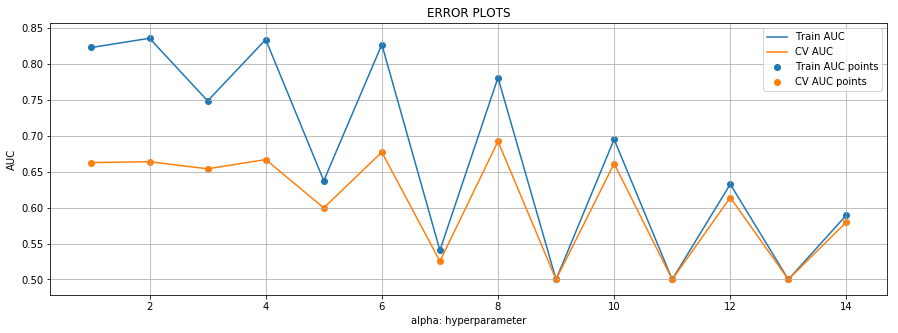

In [70]:
BestA( xtr1, xcv1, ytrain, ycv )

# Here, 1 means 10**-4  and l1    2 means 10**-4  and l2    3 means 10**-3 and l1   4 means 10**-3 and l2 ..........
# 5 means 10**-2 and l1    6 means 10**-2 and l2     7 means 10**-1 and l1 .......   

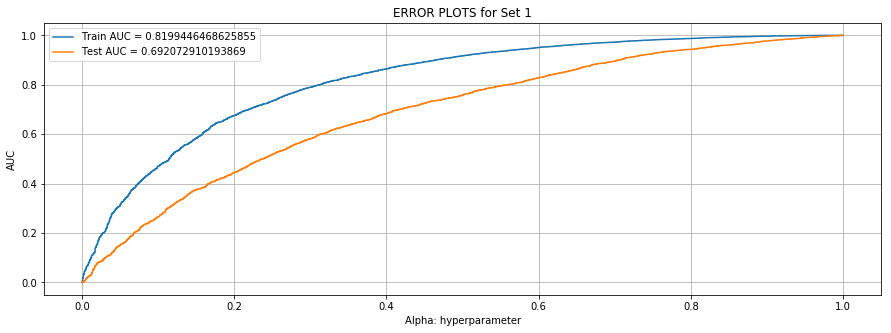

Confusion Matrix for Train of Set  1
 The maximum value of tpr*(1-fpr) =  0.5554643876946146  for threshold =  0.83
[[ 2616   847]
 [ 5202 13780]]


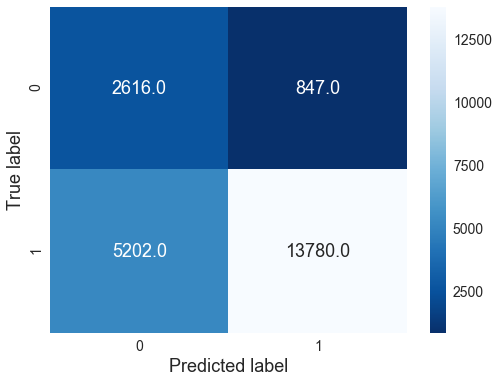



Confusion Matrix for Test of Set  1
 The maximum value of tpr*(1-fpr) =  0.4150323174979264  for threshold =  0.835
[[1589  957]
 [4785 9169]]


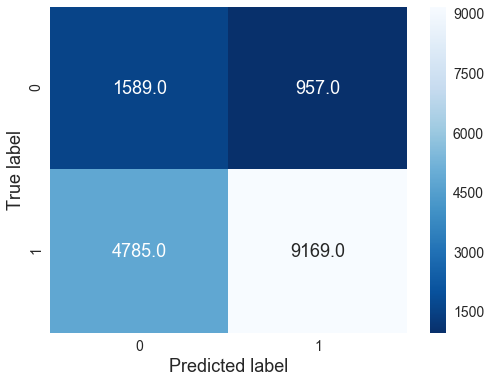

In [74]:
bestA = 10**-2
bestL = 'l2'
roc( xtr1, xte1, ytrain, ytest, bestA, bestL, 1 )

## Opeartions on Set 2

In [83]:
import importlib
importlib.reload(sn)

sn.set_style('whitegrid')

     - First -        - Second -        - Third -        - Fourth -        - Fifth -        - Sixth -        - Seventh -
################ ################ ################ ################ ################ ################ ################ 

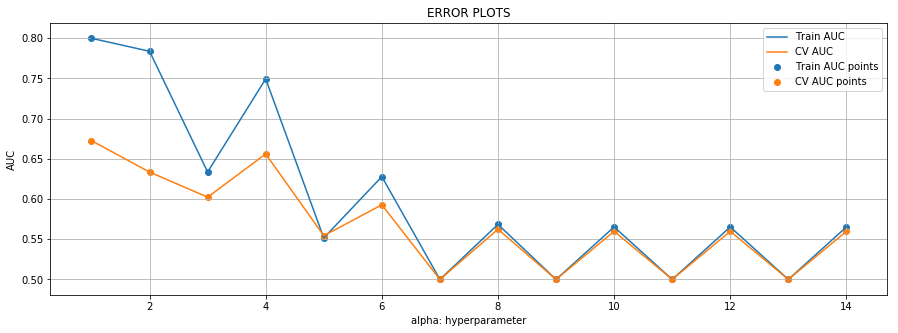

In [71]:
BestA( xtr2, xcv2, ytrain, ycv )
# Here, 1 means 10**-4  and l1    2 means 10**-4  and l2    3 means 10**-3 and l1   4 means 10**-3 and l2 ..........
# 5 means 10**-2 and l1    6 means 10**-2 and l2     7 means 10**-1 and l1 .......   

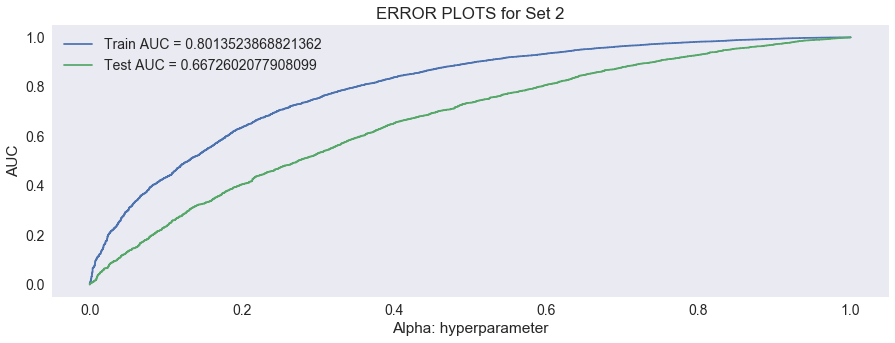

Confusion Matrix for Train of Set  2
 The maximum value of tpr*(1-fpr) =  0.5316341000348278  for threshold =  0.833
[[ 2499   964]
 [ 5088 13894]]


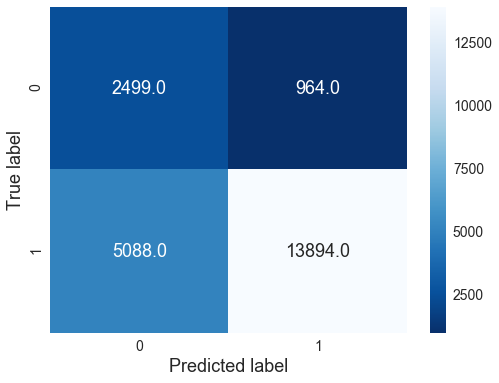



Confusion Matrix for Test of Set  2
 The maximum value of tpr*(1-fpr) =  0.3923794442541034  for threshold =  0.845
[[1625  921]
 [5529 8425]]


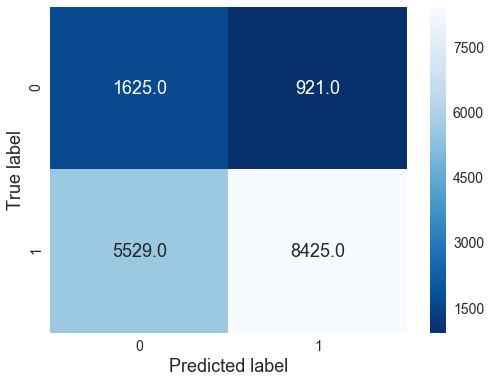

In [75]:
bestA = 10**-4
bestL = 'l2'

roc( xtr2, xte2, ytrain, ytest, bestA, bestL ,2 )


## Opeartions on Set 3

     - First -        - Second -        - Third -        - Fourth -        - Fifth -        - Sixth -        - Seventh -
################ ################ ################ ################ ################ ################ ################ 

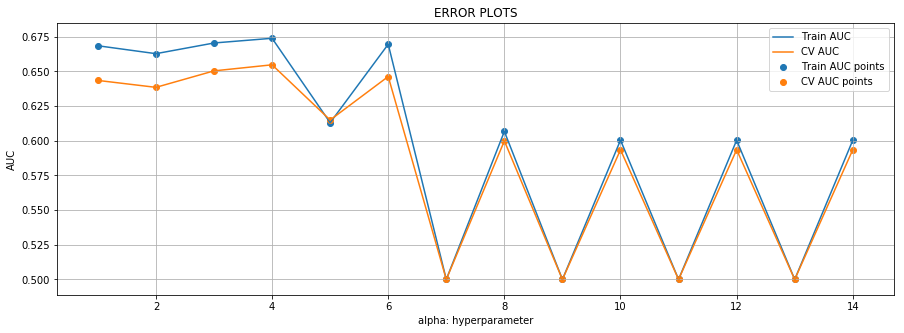

In [72]:
#sn.set_style('whitegrid')
BestA( xtr3, xcv3, ytrain, ycv )

# Here, 1 means 10**-4  and l1    2 means 10**-4  and l2    3 means 10**-3 and l1   4 means 10**-3 and l2 ..........
# 5 means 10**-2 and l1    6 means 10**-2 and l2     7 means 10**-1 and l1 .......   

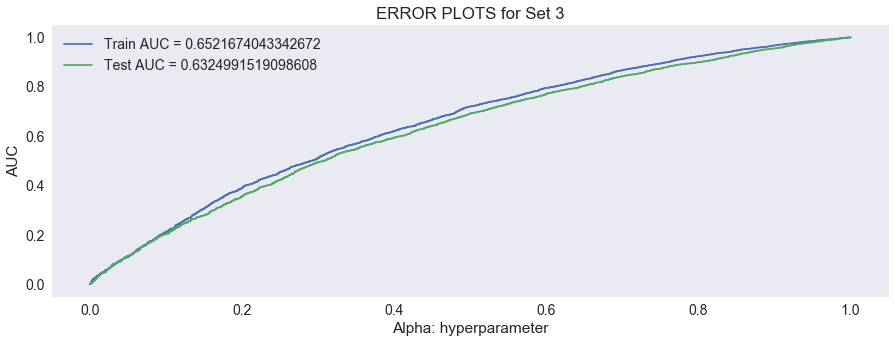

Confusion Matrix for Train of Set  3
 The maximum value of tpr*(1-fpr) =  0.3743164983906665  for threshold =  0.838
[[ 1981  1482]
 [ 6782 12200]]


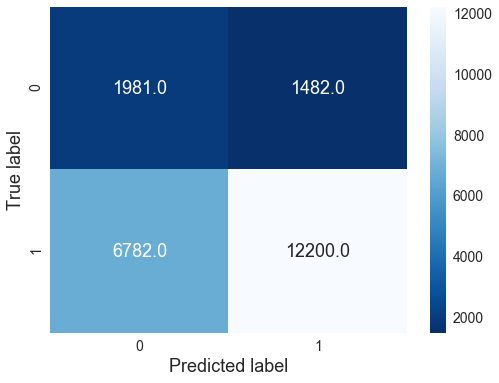



Confusion Matrix for Test of Set  3
 The maximum value of tpr*(1-fpr) =  0.3593868519400688  for threshold =  0.843
[[1488 1058]
 [5531 8423]]


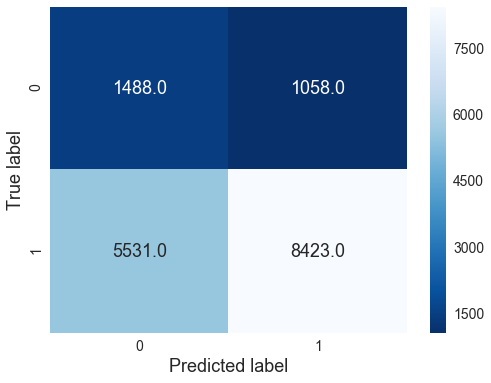

In [81]:
bestA = 10**-2
bestL = "l2"

roc( xtr3, xte3, ytrain, ytest, bestA, bestL, 3 )

## Opeartions on Set 4

     - First -        - Second -        - Third -        - Fourth -        - Fifth -        - Sixth -        - Seventh -
################ ################ ################ ################ ################ ################ ################ 

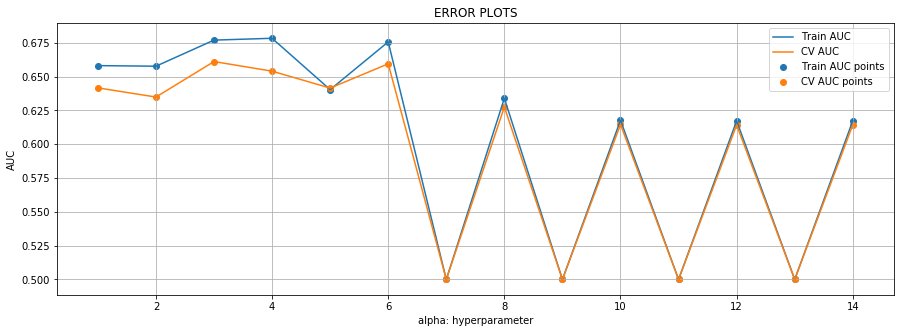

In [73]:
#sn.set_style('whitegrid')

BestA( xtr4, xcv4, ytrain, ycv )

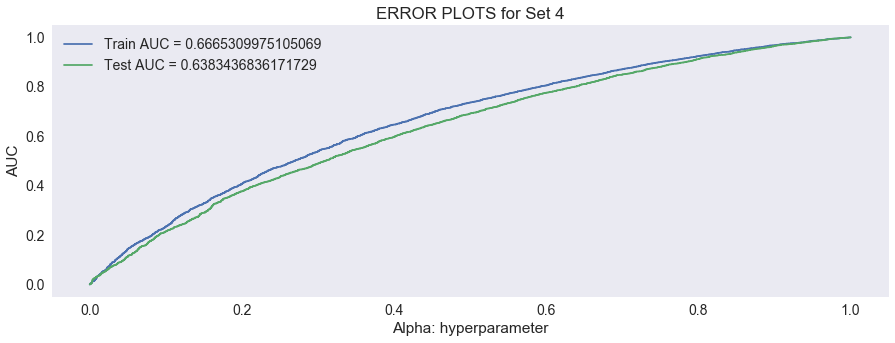

Confusion Matrix for Train of Set  4
 The maximum value of tpr*(1-fpr) =  0.39098685007390166  for threshold =  0.837
[[ 2015  1448]
 [ 6443 12539]]


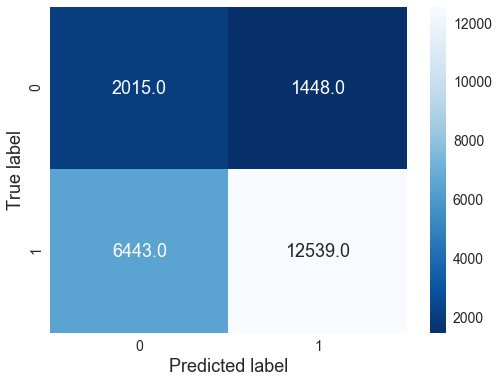



Confusion Matrix for Test of Set  4
 The maximum value of tpr*(1-fpr) =  0.36012066242567176  for threshold =  0.845
[[1533 1013]
 [5661 8293]]


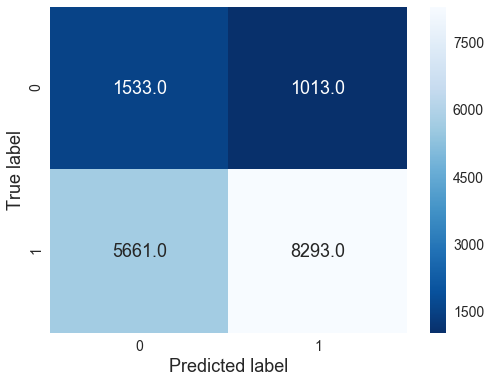

In [84]:
bestA = 10**-2
bestL = "l2"

roc( xtr4, xte4, ytrain, ytest, bestA, bestL, 4 )

## Sentiment Values

In [85]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

s = SentimentIntensityAnalyzer()

neg = []
pos = []
neu = []
comp = []

for sentence in tqdm( donor['cleanEssay'].values ) :
    
    Sscore = s.polarity_scores( sentence )

    neg.append( Sscore['neg'] )
    pos.append( Sscore['pos'] )
    neu.append( Sscore['neu'] )
    comp.append( Sscore['compound'] )

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [04:02<00:00, 206.60it/s]


In [86]:
print( neg[0: 15] )
print( pos[0: 15] )
print( neu[0: 15] )
print( comp[0: 15] )

[0.008, 0.037, 0.058, 0.053, 0.016, 0.077, 0.028, 0.019, 0.007, 0.05, 0.068, 0.021, 0.005, 0.078, 0.023]
[0.08, 0.111, 0.183, 0.215, 0.087, 0.146, 0.172, 0.155, 0.249, 0.281, 0.177, 0.246, 0.228, 0.094, 0.142]
[0.912, 0.852, 0.759, 0.732, 0.897, 0.777, 0.8, 0.826, 0.744, 0.669, 0.755, 0.733, 0.767, 0.828, 0.835]
[0.9611, 0.9267, 0.9953, 0.9931, 0.9192, 0.9553, 0.9815, 0.9937, 0.9975, 0.9969, 0.9862, 0.9992, 0.9948, 0.4401, 0.972]


In [87]:
donor['neg'] = neg
donor['pos'] = pos
donor['neu'] = neu
donor['comp'] = comp

## Total No. of words

In [88]:
def totalWords( col ):
    
    words = []
    for sent in tqdm( donor[col].values ) :
        w = 0
        
        for word in sent.split():
            w += 1
    
        words.append(w)
    
    return words

In [89]:
titleWords = totalWords('cleanTitle')

print( titleWords[0:15] )
len( titleWords )

100%|████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 527736.76it/s]


[5, 4, 6, 2, 3, 7, 5, 2, 3, 3, 3, 5, 4, 3, 4]


50000

In [90]:
essayWords = totalWords('cleanEssay')

len( essayWords )

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 27253.82it/s]


50000

In [91]:
donor['totalWordsTitle'] = titleWords

donor['totalWordsEssay'] = essayWords

In [92]:
X = donor

In [93]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.33, stratify = Y) # Spliting into Test and Train

# stratify : we need to pass array containing class label as an argument to stratify

xtrain, xcv, ytrain, ycv = train_test_split( xtrain, ytrain, test_size = 0.33, stratify = ytrain )

## Sentiment and Length features

In [94]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['neg'].values.reshape(-1,1) )

xtrNeg = norm.transform( xtrain['neg'].values.reshape(-1,1) )
xcvNeg = norm.transform( xcv['neg'].values.reshape(-1,1) )
xteNeg = norm.transform( xtest['neg'].values.reshape(-1,1) )

print( xtrNeg.shape )
print( xcvNeg.shape )
print( xteNeg.shape )

(22445, 1)
(11055, 1)
(16500, 1)


In [95]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['pos'].values.reshape(-1,1) )

xtrPos = norm.transform( xtrain['pos'].values.reshape(-1,1) )
xcvPos = norm.transform( xcv['pos'].values.reshape(-1,1) )
xtePos = norm.transform( xtest['pos'].values.reshape(-1,1) )

print( xtrPos.shape )
print( xcvPos.shape )
print( xtePos.shape )

(22445, 1)
(11055, 1)
(16500, 1)


In [96]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['neu'].values.reshape(-1,1) )

xtrNeu = norm.transform( xtrain['neu'].values.reshape(-1,1) )
xcvNeu = norm.transform( xcv['neu'].values.reshape(-1,1) )
xteNeu = norm.transform( xtest['neu'].values.reshape(-1,1) )

print( xtrNeu.shape )
print( xcvNeu.shape )
print( xteNeu.shape )

(22445, 1)
(11055, 1)
(16500, 1)


In [97]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['comp'].values.reshape(-1,1) )

xtrComp = norm.transform( xtrain['comp'].values.reshape(-1,1) )
xcvComp = norm.transform( xcv['comp'].values.reshape(-1,1) )
xteComp = norm.transform( xtest['comp'].values.reshape(-1,1) )

print( xtrComp.shape )
print( xcvComp.shape )
print( xteComp.shape )

(22445, 1)
(11055, 1)
(16500, 1)


In [98]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['totalWordsTitle'].values.reshape(-1,1) )

xtrTWT = norm.transform( xtrain['totalWordsTitle'].values.reshape(-1,1) )
xcvTWT = norm.transform( xcv['totalWordsTitle'].values.reshape(-1,1) )
xteTWT = norm.transform( xtest['totalWordsTitle'].values.reshape(-1,1) )

print( xtrTWT.shape )
print( xcvTWT.shape )
print( xteTWT.shape )

(22445, 1)
(11055, 1)
(16500, 1)


In [99]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['totalWordsEssay'].values.reshape(-1,1) )

xtrTWE = norm.transform( xtrain['totalWordsEssay'].values.reshape(-1,1) )
xcvTWE = norm.transform( xcv['totalWordsEssay'].values.reshape(-1,1) )
xteTWE = norm.transform( xtest['totalWordsEssay'].values.reshape(-1,1) )

print( xtrTWE.shape )
print( xcvTWE.shape )
print( xteTWE.shape )

(22445, 1)
(11055, 1)
(16500, 1)


In [100]:
xtrEssayTFIDF.shape

(22445, 5000)

## Truncated SVD on Essay TFIDF 

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD( n_components = 2000 )

xtrEssaySVD = svd.fit_transform( xtrEssayTFIDF )

perVarianceExplained = svd.explained_variance_ / np.sum( svd.explained_variance_ )
# explained_variance_ : The variance of the training samples transformed by a projection to each component.
# explained_variance_ratio_ : Percentage of variance explained by each of the selected components. 

# Instead of explained_variance_ why didn't i use explained_variance_ratio_ directly ????

cumVarianceExplained = np.cumsum( perVarianceExplained )

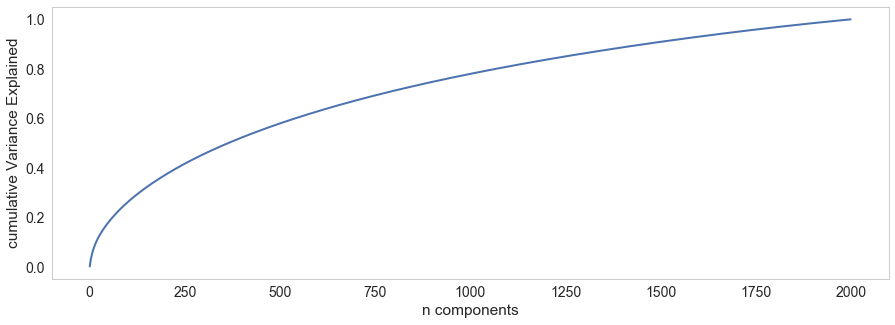

In [108]:
sn.set_style('whitegrid')

plt.figure( figsize = (15,5) )
plt.plot( cumVarianceExplained, linewidth = 2 )
plt.grid()
plt.xlabel('n components')
plt.ylabel('cumulative Variance Explained')
plt.show()

This graph means if i go from 5000 dimension to 250 ( n components ) dimension 40 % of the variance ( Cumulative Varinace Expalined )  is explained

If i want 80 % of the varinace to be explained i would have to go from 5000 dim to 1000 dim

If would have to pick roughly 1400 dims for variance equal to 90 %

In [102]:
n =  1400
svd = TruncatedSVD( n_components = n )

svd.fit( xtrEssayTFIDF )

xtrEssaySVD = svd.transform( xtrEssayTFIDF )
xcvEssaySVD = svd.transform( xcvEssayTFIDF )
xteEssaySVD = svd.transform( xteEssayTFIDF )

print( xtrEssaySVD.shape )
print( xcvEssaySVD.shape )
print( xteEssaySVD.shape )

(22445, 1400)
(11055, 1400)
(16500, 1400)


### Set 5

In [103]:
# Set 5
from scipy.sparse import hstack

xtr5 = hstack(( xtrTWE, xtrTWT, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrQuan, xtrPrev, \
                         xtrNeg, xtrPos, xtrNeu, xtrComp, xtrEssaySVD )).tocsr()

xcv5 = hstack(( xcvTWE, xcvTWT, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvQuan, xcvPrev, \
                         xcvNeg, xcvPos, xcvNeu, xcvComp, xcvEssaySVD )).tocsr()


xte5 = hstack(( xteTWE, xteTWT, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xteQuan, xtePrev, \
                         xteNeg, xtePos, xteNeu, xteComp, xteEssaySVD )).tocsr()


print( xtr5.shape, ytrain.shape )
print( xcv5.shape, ycv.shape )
print( xte5.shape, ytest.shape )

(22445, 1525) (22445,)
(11055, 1525) (11055,)
(16500, 1525) (16500,)


     - First -        - Second -        - Third -        - Fourth -        - Fifth -        - Sixth -        - Seventh -
################ ################ ################ ################ ################ ################ ################ 

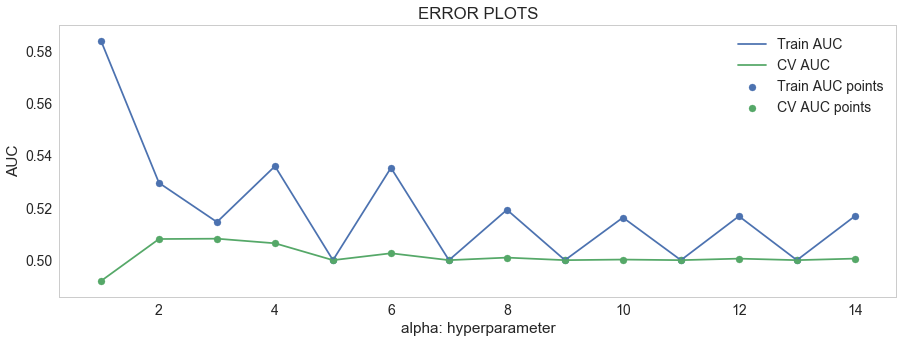

In [104]:
sn.set_style('whitegrid')

BestA( xtr5, xcv5, ytrain, ycv )

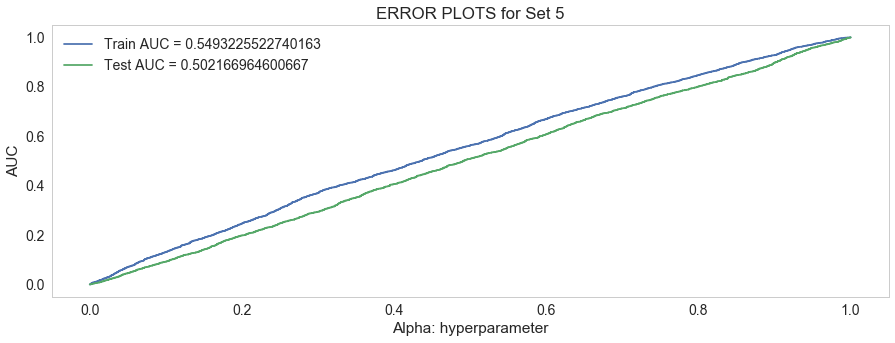

Confusion Matrix for Train of Set  5
 The maximum value of tpr*(1-fpr) =  0.2855521012307266  for threshold =  0.846
[[ 1688  1775]
 [ 8144 10838]]


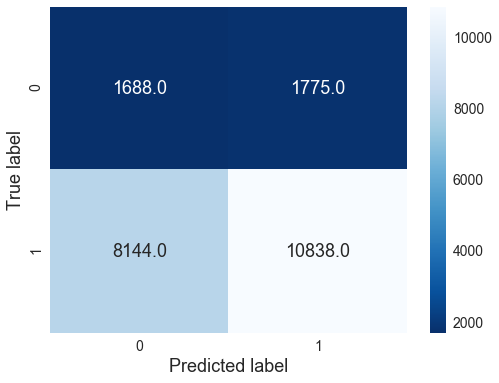



Confusion Matrix for Test of Set  5
 The maximum value of tpr*(1-fpr) =  0.2554852826383535  for threshold =  0.846
[[1169 1377]
 [6401 7553]]


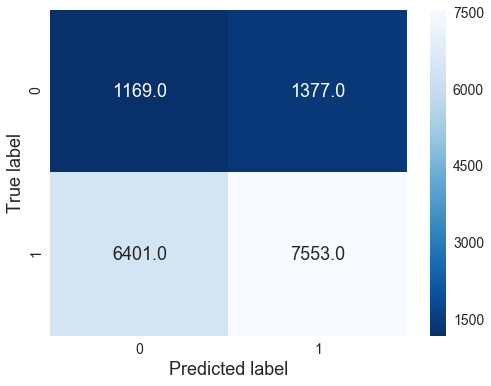

In [113]:
bestA = 10**-4
bestL = "l2"

sn.set_style('whitegrid')

roc( xtr5, xte5, ytrain, ytest, bestA, bestL, 5 )

In [114]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Set "," Vectorizer ", " Best Alpha ", " Best Penalty ", " Train AUC ", " Test AUC "]

x.add_row( [ " Set 1 ", " B.O.W ", " 10**-2 ", " l2 ", " 0.8199 ", " 0.6920 " ] ) 
x.add_row( [ " Set 2 ", " TFIDF ", " 10**-4 ", " l2 ", " 0.8013 ", " 0.6747 " ] )
x.add_row( [ " Set 3 ", " Avg W2V ", " 10**-2 ", " l2 ", " 0.6521 ", " 0.6324 " ] )
x.add_row( [ " Set 4 ", " WW2V ", " 10**-2 ", " l2 ", " 0.6665 ", " 0.6384 " ] )
x.add_row( [ " Set 5 ", " Normalizer ", " 10**-4 ", " l2 ", " 0.5493 ", " 0.5021 " ] )

print( x )

# Ref : http://zetcode.com/python/prettytable/

+---------+--------------+--------------+----------------+-------------+------------+
|   Set   |  Vectorizer  |  Best Alpha  |  Best Penalty  |  Train AUC  |  Test AUC  |
+---------+--------------+--------------+----------------+-------------+------------+
|  Set 1  |    B.O.W     |    10**-2    |       l2       |    0.8199   |   0.6920   |
|  Set 2  |    TFIDF     |    10**-4    |       l2       |    0.8013   |   0.6747   |
|  Set 3  |   Avg W2V    |    10**-2    |       l2       |    0.6521   |   0.6324   |
|  Set 4  |     WW2V     |    10**-2    |       l2       |    0.6665   |   0.6384   |
|  Set 5  |  Normalizer  |    10**-4    |       l2       |    0.5493   |   0.5021   |
+---------+--------------+--------------+----------------+-------------+------------+


## Conclusion

There are some missing values in teacher_prefix column

B.O.W. approach gives the best result in Train AUC 

Out of all the other approaches B.O.W. to Vec approach has the highest Test AUC